# Individual Project Report

# 1) Data Description:
* Both sets of data were collected by a research group in Computer Science at UBC that is led by Frank Wood to collect data about how people play video games


In [22]:
library(tidyverse)
players <- read_csv("https://raw.githubusercontent.com/lemonkmcampbell-hue/DSCIProject/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/lemonkmcampbell-hue/DSCIProject/refs/heads/main/sessions.csv")
player_summary <- summary(players)
sessions_summary <-summary(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## players.csv:
#### Number of Observations and Variables: 
* There are 196 observations and 7 variables
#### Summary Statistics:
|Variable|Minimum|Median|Mean|Maximum|
|--------|-------|------|----|-------|
|age|9.00|19.00|21.14|58.00|
|hours_played|0.00|0.100|5.846|223.100|
#### Overview of Variables:
|Name|Type| Description|
|----|----|------------|
|experience|chr| Level of play experience of the game|
|subscribe|logi| A true or false answer for whether parcipitants have subscribed to the game or not|
|hashedEmail|chr| A sequence of numbers and letters that represents the users email|
|played_hours|dbl|The number of hours played|
|name|chr|Name of User/Participant|
|gender|chr| Gender of User/Participant|
|Age|dbl|Age of User/Participant|
#### Issues in the Data:
* There are some N/A or missing values within age
* Have factor types that should be changed such as age should be an integer
* May be potential unseen errors in sampling or bias in data collection
* Separate from the other data set

## sessions.csv:
#### Number of Observations and Variables: 
*There are 1535 observations and 5 variables
#### Summary Statistics:
|Variable|Minimum|Median|Mean|Maximum|
|--------|-------|------|----|-------|
|original_start_time|$1.712*10^{12}$|$1.719*10^{12}$|$1.719*10^{12}$|$1.727*10^{12}$|
|original_end_time|$1.712*10^{12}$|$1.719*10^{12}$|$1.719*10^{12}$|$1.727*10^{12}$|
#### Overview of Variables:
|Name|Type| Description|
|----|----|------------|
|hashedEmail|chr| A sequence of numbers and letters that represents the users email|
|start_time|chr|The date and time the user started playing|
|end_time|chr|The date and time the user finished playing|
|original_start_time|dbl| Timestamp for the start time|
|original_end_time|dbl|Timestamp for the end time|
#### Issues in the Data:
* There are some N/A or missing values within original_end_time
* Needs to be tidied as end and start time both appear twice which is unnecessary
* May be potential unseen errors in sampling or bias in data collection
* Separate from the other data set

# 2) Questions:
* **Broad Question**: Which "kinds" of players are most likely to contribute a large amount of data? This is so the team is able to target them in recruiting efforts.
* **Specific Question**: Can a player's level of experience, gender, and age predict the amount of time they play the game for in the player’s dataset?
* The data will help me address this question as the players dataset includesthese variables. I plan to group based on experience or gender and then calculate summary statistics and create visual models based on those groups. Once I rearrange the data I will also be able to use the predictive methods learned in class to achieve a result.

# 3) Exploratory Data Analysis and Visualization:
#### Reading in the data:
* Start by loading in the tidyverse library using the library function
* The data is loaded in during the Data Description section as well as below

In [28]:
players <- read_csv("https://raw.githubusercontent.com/lemonkmcampbell-hue/DSCIProject/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/lemonkmcampbell-hue/DSCIProject/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Tidying Data:
* players.csv already follows the rules for a tidy data set and requires no additional wrangling
* sessions.csv has start time and end time twice so that has been fixed below to tidy the data

In [29]:
sessions_best <- sessions|> select(-original_start_time, -original_end_time)

#### Mean Values for players.csv:


In [68]:
played_hours_mean<- mean(players$played_hours)
age_mean <- mean(players$Age, na.rm=TRUE)


|Variable|Mean|
|--------|----|
|played_hours|5.85|
|Age|21.14|


#### Visualizations:
* Need to install the RColorBrewer library in order to make visualizations a specific color palette

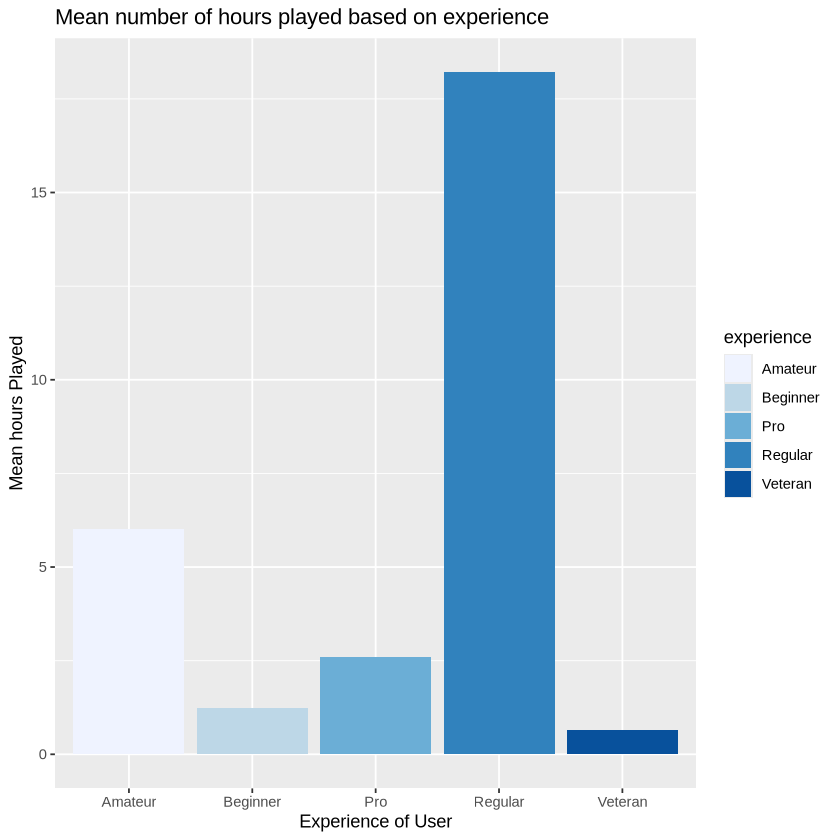

In [104]:
library(RColorBrewer)
players_experience <- players |> 
    group_by(experience) |> 
    summarise(mean_played_hours=mean(played_hours, na.rm=TRUE))
players_experience_plot <- players_experience |> 
    ggplot(aes(x=experience, y=mean_played_hours, fill=experience)) + 
    geom_bar(stat="identity") + 
    labs(x="Experience of User", y="Mean hours Played", title= "Mean number of hours played based on experience", Fill= "experience of User") + 
    scale_fill_brewer(palette="Blues")
players_experience_plot

#### Insights
* Regular level users spend on average the most time by far compared to the other groups
* Veteran users spend the least amount of time
* Doesn't appear to increase/decrease as experience increases/decreases

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


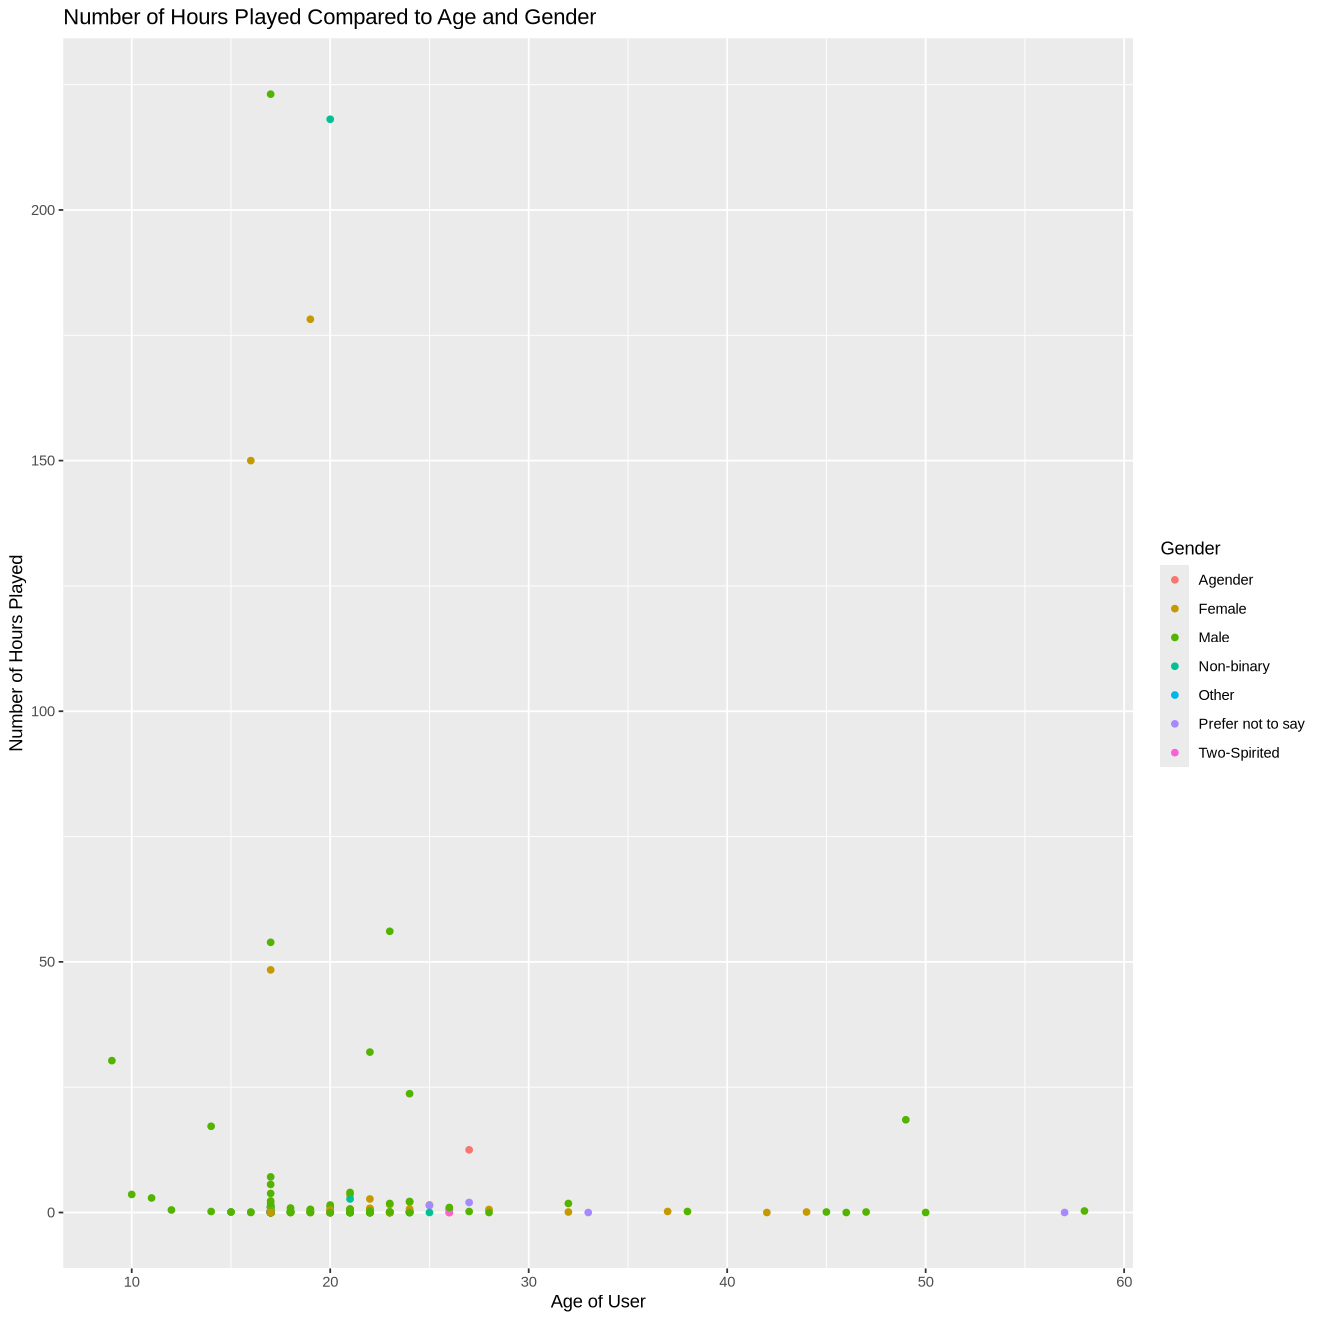

In [112]:
options(repr.plot.width = 11, repr.plot.height = 11)
age_hours_plot <- players |> ggplot(aes(x=Age, y=played_hours, color=gender)) +
    geom_point() +
    labs(x="Age of User", y="Number of Hours Played", title="Number of Hours Played Compared to Age and Gender", color="Gender") 
age_hours_plot


#### Insights
* Many of the hours played are close to $0$ which could produce a problem when analysing the data
* Seems to be a large portion of the data that is male
* Not much of a pattern 

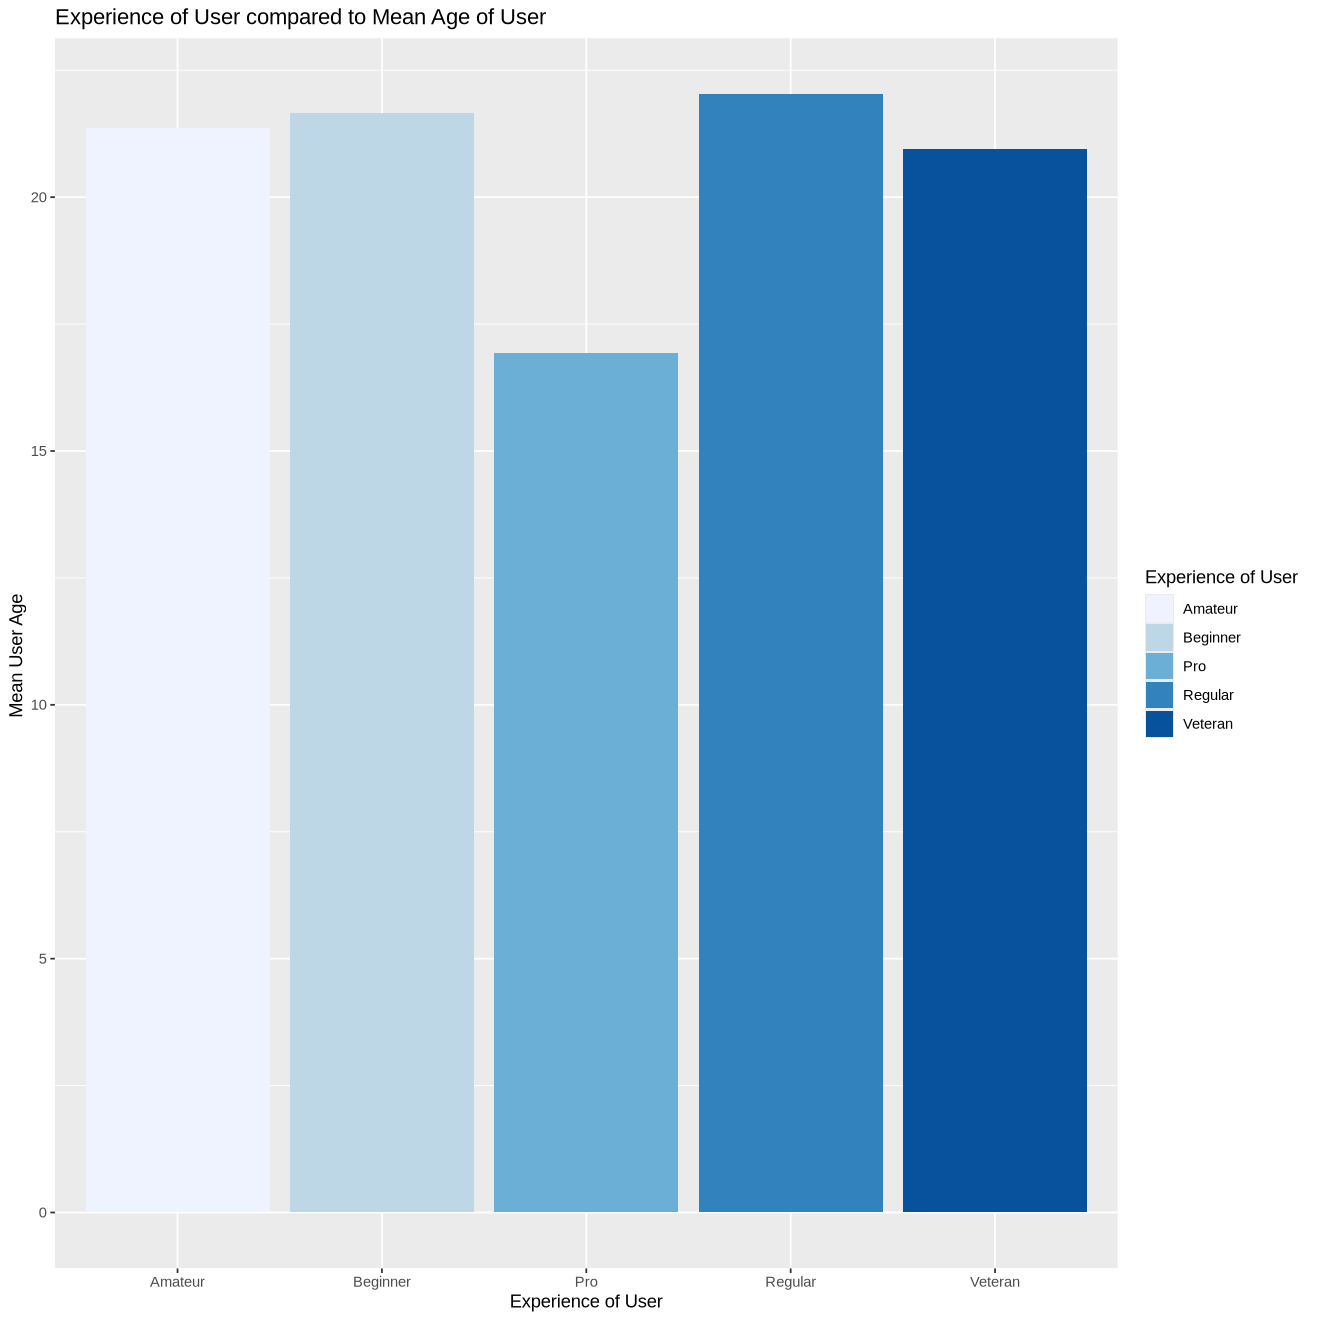

In [124]:
players_age <- players |> 
    group_by(experience) |> 
    summarise(mean_age=mean(Age, na.rm=TRUE))
experience_age_plot <- players_age |> ggplot(aes(x=experience, y=mean_age, fill=experience)) +
    geom_bar(stat="identity") +
    labs(x="Experience of User", y="Mean User Age ", title="Experience of User compared to Mean Age of User", fill="Experience of User") +
    scale_fill_brewer(palette="Blues")
experience_age_plot

#### Insights
* There is a slightly lower average age for Pro experience
* All other experience levels have similar average ages


# 4) Methods and Plan
* One method to address my question of interest is a knn multivariable regression>
* This method allows for multiple predictors while not assuming the shape of the data and will help to predict how much time users spend based on their qualities.
* The assumption that the data has been tidied and that there is an appropriate number of observations or amount of data to perform the regression. There also needs to be a relatively even balance of the different predictors in order for the prediction to be accurate.
* It is also assumed that the data will be scaled and centered to assure even weight between variables.
* Potential limitations include the strength the value k has on predicting accurate data and the different predictors might not lead to an accurate model.
* I am going to tune the model to find the best value for k and I will compare different k values in order to select the best model. 
* To process the data I will first split the data into training and testing using a 70%, 30% split. Then I will perform a five fold cross validation using the training data. I will eventually use my model to predict the testing data set and calculate the RMSPE to determine the accuracy.
